# Import Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')

# This is for gender guessing based on first name, 
# you may have to install it by uncomment the following code
# pip install gender-guesser  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(8, 6)) # figure size

import datetime as dt #datetime values
import missingno as msno # viz missing values

sns.set_style("darkgrid")
import itertools

<Figure size 576x432 with 0 Axes>

# Initial EDA (Exploratory Data Analysis)

**Read tables**

In [3]:
Transactions = pd.read_excel('KPMG.xlsx', sheet_name=1, skiprows=[0])

In [6]:
NewCustomer = pd.read_excel('KPMG.xlsx', sheet_name=2, skiprows=[0])

In [7]:
CustomerDemo = pd.read_excel('KPMG.xlsx', sheet_name=3, skiprows=[0])

In [8]:
CustomerAddr = pd.read_excel('KPMG.xlsx', sheet_name=4, skiprows=[0])

## Table: Transactions

In [9]:
# First five lines
Transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0             140          11          462       2017-01-01           0.0   
1             517          77          311       2017-01-01           1.0   
2             561          65         2298       2017-01-01           0.0   
3            1293          67         1931       2017-01-01           1.0   
4            1403           0         2891       2017-01-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved  Giant Bicycles     Standard          high       medium   
1     Approved        WeareA2B     Standard        medium       medium   
2     Approved        WeareA2B     Standard        medium       medium   
3     Approved  Norco Bicycles         Road        medium       medium   
4     Approved      OHM Cycles     Standard        medium       medium   

   list_price  standard_cost  product_first_sold_date  
0     1274.93         764.96                  42560.0  
1     1769.64         108.76                  40672.0  
2     1807.45         778.69                  40410.0  
3      544.05         376.84                  38647.0  
4      183.86         137.90                  34170.0

In [10]:
# Data shape & type
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [11]:
# Check missing values
Transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

<AxesSubplot:>

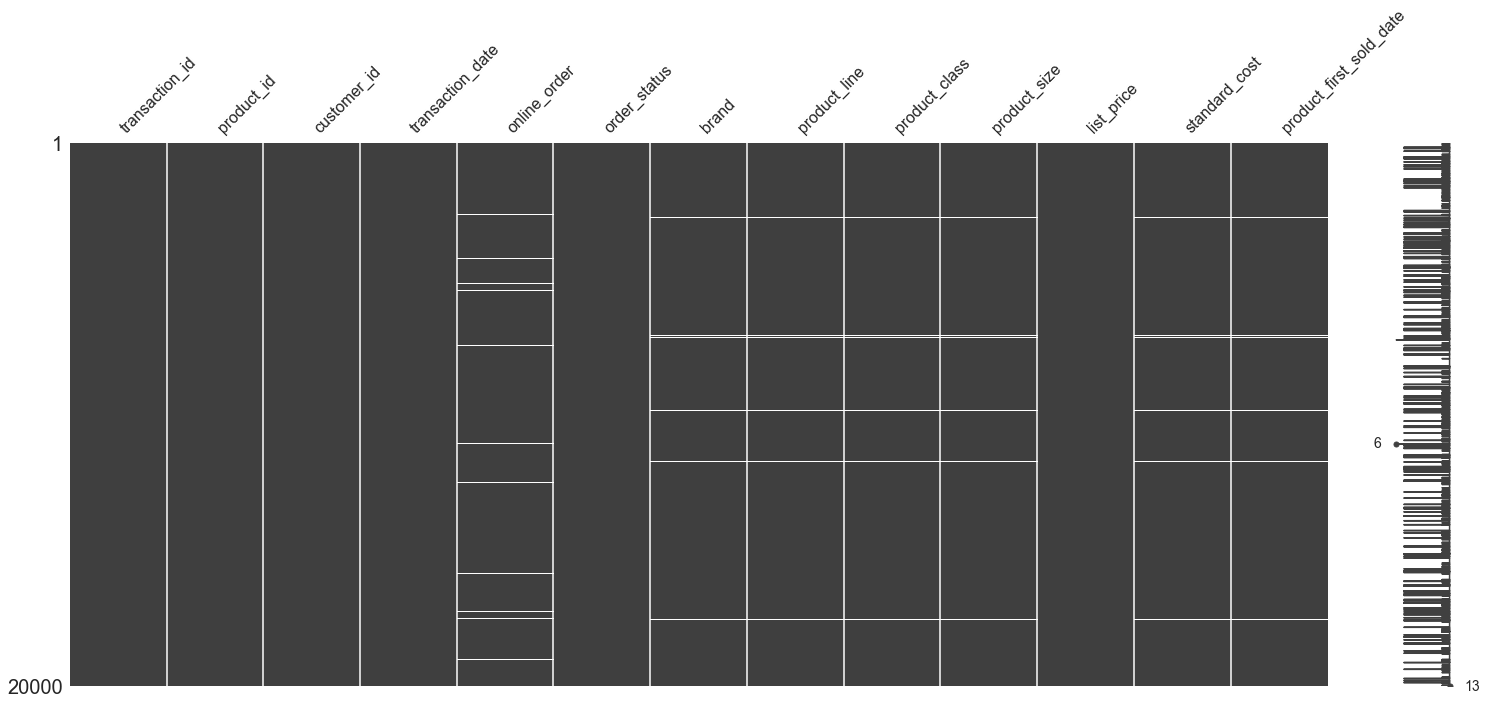

In [12]:
# Visualize missing values as a matrix
msno.matrix(Transactions)

In [13]:
# Check unique values
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [14]:
# Five NUmbers Summary
Transactions.describe(include='all')

transaction_id   product_id   customer_id     transaction_date  \
count     20000.000000  20000.00000  20000.000000                20000   
unique             NaN          NaN           NaN                  364   
top                NaN          NaN           NaN  2017-08-18 00:00:00   
freq               NaN          NaN           NaN                   82   
first              NaN          NaN           NaN  2017-01-01 00:00:00   
last               NaN          NaN           NaN  2017-12-30 00:00:00   
mean      10000.500000     45.36465   1738.246050                  NaN   
std        5773.647028     30.75359   1011.951046                  NaN   
min           1.000000      0.00000      1.000000                  NaN   
25%        5000.750000     18.00000    857.750000                  NaN   
50%       10000.500000     44.00000   1736.000000                  NaN   
75%       15000.250000     72.00000   2613.000000                  NaN   
max       20000.000000    100.00000   5034.000000                  NaN   

        online_order order_status  brand product_line product_class  \
count   19640.000000        20000  19803        19803         19803   
unique           NaN            2      6            4             3   
top              NaN     Approved  Solex     Standard        medium   
freq             NaN        19821   4253        14176         13826   
first            NaN          NaN    NaN          NaN           NaN   
last             NaN          NaN    NaN          NaN           NaN   
mean        0.500458          NaN    NaN          NaN           NaN   
std         0.500013          NaN    NaN          NaN           NaN   
min         0.000000          NaN    NaN          NaN           NaN   
25%         0.000000          NaN    NaN          NaN           NaN   
50%         1.000000          NaN    NaN          NaN           NaN   
75%         1.000000          NaN    NaN          NaN           NaN   
max         1.000000          NaN    NaN          NaN           NaN   

       product_size    list_price  standard_cost  product_first_sold_date  
count         19803  20000.000000   19803.000000             19803.000000  
unique            3           NaN            NaN                      NaN  
top          medium           NaN            NaN                      NaN  
freq          12990           NaN            NaN                      NaN  
first           NaN           NaN            NaN                      NaN  
last            NaN           NaN            NaN                      NaN  
mean            NaN   1107.829449     556.046951             38199.776549  
std             NaN    582.825242     405.955660              2875.201110  
min             NaN     12.010000       7.210000             33259.000000  
25%             NaN    575.270000     215.140000             35667.000000  
50%             NaN   1163.890000     507.580000             38216.000000  
75%             NaN   1635.300000     795.100000             40672.000000  
max             NaN   2091.470000    1759.850000             42710.000000

**Conclusions:**
- One transaction only contains one product. 
- 20,000 entries

**Problems need to be tackled:**
- Convert "product_first_sold_date" to a date
- Removew rows containing Null

## Table: CustomerDemo

In [15]:
# First five lines
CustomerDemo.head()

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                     NaN   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator  \
0                Health      Mass Customer                  N   
1    Financial Services      Mass Customer                  N   
2              Property      Mass Customer                  N   
3                    IT      Mass Customer                  N   
4                   NaN  Affluent Customer                  N   

                                             default owns_car  tenure  
0                                                 "'      Yes    11.0  
1                       <script>alert('hi')</script>      Yes    16.0  
2                                2018-02-01 00:00:00      Yes    15.0  
3  () { _; } >_[$($())] { touch /tmp/blns.shellsh...       No     7.0  
4                                                NIL      Yes     8.0

In [16]:
# Data shape & type
CustomerDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [17]:
# Check missing values
CustomerDemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

<AxesSubplot:>

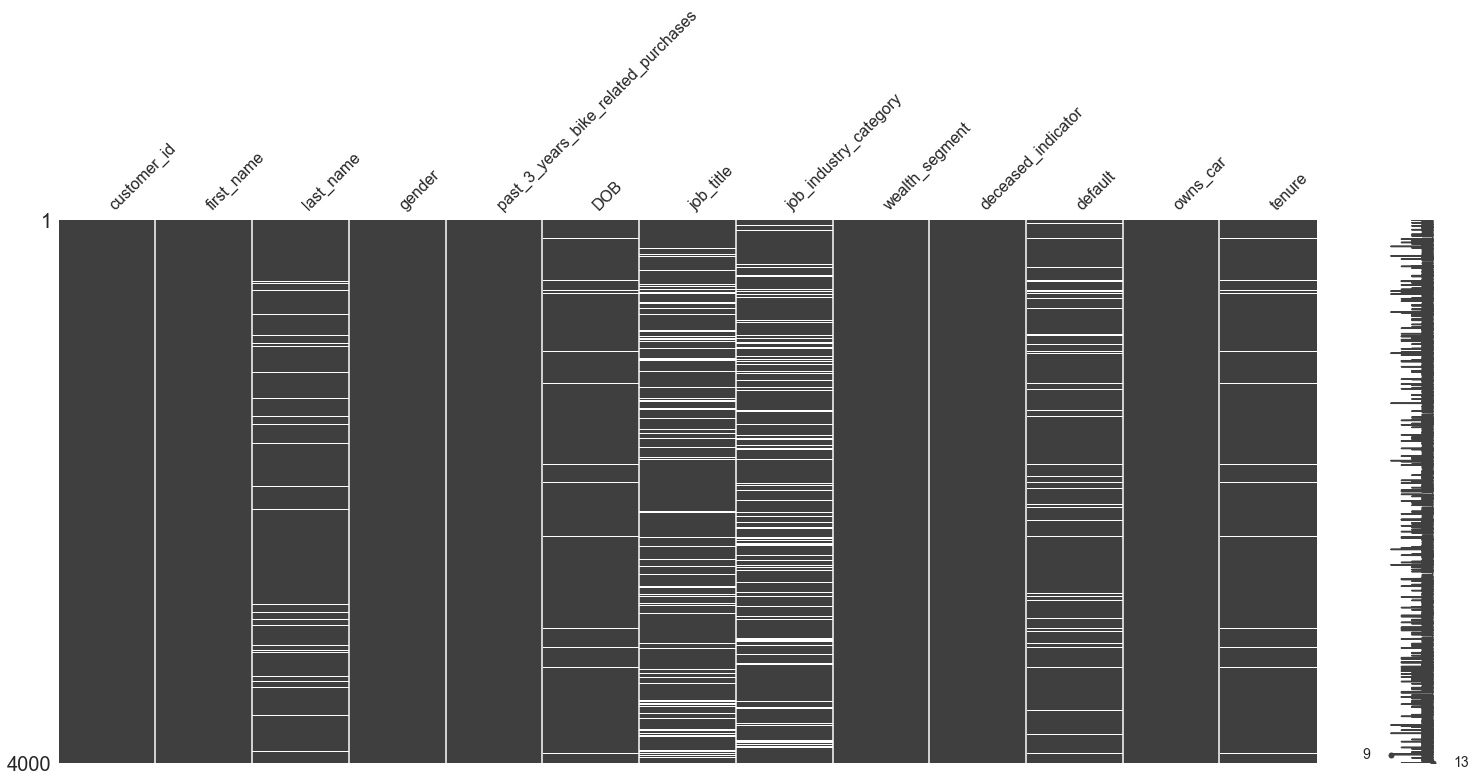

In [18]:
# Visualize missing values as a matrix
msno.matrix(CustomerDemo)

In [19]:
# Check unique values
CustomerDemo.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [20]:
# Five NUmbers Summary
CustomerDemo.describe(include='all')

customer_id first_name last_name  gender  \
count   4000.000000       4000      3875    4000   
unique          NaN       3139      3725       6   
top             NaN        Max  Pristnor  Female   
freq            NaN          5         3    2037   
first           NaN        NaN       NaN     NaN   
last            NaN        NaN       NaN     NaN   
mean    2000.500000        NaN       NaN     NaN   
std     1154.844867        NaN       NaN     NaN   
min        1.000000        NaN       NaN     NaN   
25%     1000.750000        NaN       NaN     NaN   
50%     2000.500000        NaN       NaN     NaN   
75%     3000.250000        NaN       NaN     NaN   
max     4000.000000        NaN       NaN     NaN   

        past_3_years_bike_related_purchases                  DOB  \
count                           4000.000000                 3913   
unique                                  NaN                 3448   
top                                     NaN  1978-01-30 00:00:00   
freq                                    NaN                    7   
first                                   NaN  1843-12-21 00:00:00   
last                                    NaN  2002-03-11 00:00:00   
mean                              48.890000                  NaN   
std                               28.715005                  NaN   
min                                0.000000                  NaN   
25%                               24.000000                  NaN   
50%                               48.000000                  NaN   
75%                               73.000000                  NaN   
max                               99.000000                  NaN   

                                   job_title job_industry_category  \
count                                   3494                  3344   
unique                                   195                     9   
top     Business Systems Development Analyst         Manufacturing   
freq                                      45                   799   
first                                    NaN                   NaN   
last                                     NaN                   NaN   
mean                                     NaN                   NaN   
std                                      NaN                   NaN   
min                                      NaN                   NaN   
25%                                      NaN                   NaN   
50%                                      NaN                   NaN   
75%                                      NaN                   NaN   
max                                      NaN                   NaN   

       wealth_segment deceased_indicator  default owns_car       tenure  
count            4000               4000   3698.0     4000  3913.000000  
unique              3                  2     90.0        2          NaN  
top     Mass Customer                  N    100.0      Yes          NaN  
freq             2000               3998    113.0     2024          NaN  
first             NaN                NaN      NaN      NaN          NaN  
last              NaN                NaN      NaN      NaN          NaN  
mean              NaN                NaN      NaN      NaN    10.657041  
std               NaN                NaN      NaN      NaN     5.660146  
min               NaN                NaN      NaN      NaN     1.000000  
25%               NaN                NaN      NaN      NaN     6.000000  
50%               NaN                NaN      NaN      NaN    11.000000  
75%               NaN                NaN      NaN      NaN    15.000000  
max               NaN                NaN      NaN      NaN    22.000000

In [21]:
CustomerDemo['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [22]:
CustomerDemo['job_title'].isnull().sum()

506

In [23]:
CustomerDemo['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [24]:
CustomerDemo['job_industry_category'].isnull().sum()

656

**Conclusions:**
- Some columns contains missing values
- 4,000 entries

**Problems need to be tackled:**
- Fill in missing values in "last name" with 'unknown'
- Replace missing values in col "job_title" & com "job_industry" with "unknown"
- "gender" col needs to be cleaned
- "defaul" col needs to be removed
- 'DOB' has some odd values and missing values
- 'tenure' col has some missing values

## Table: CustomerAddr

In [25]:
# First five lines
CustomerAddr.head(5)

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [26]:
# Data shape & type
CustomerAddr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [27]:
# Check missing values
CustomerAddr.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

<AxesSubplot:>

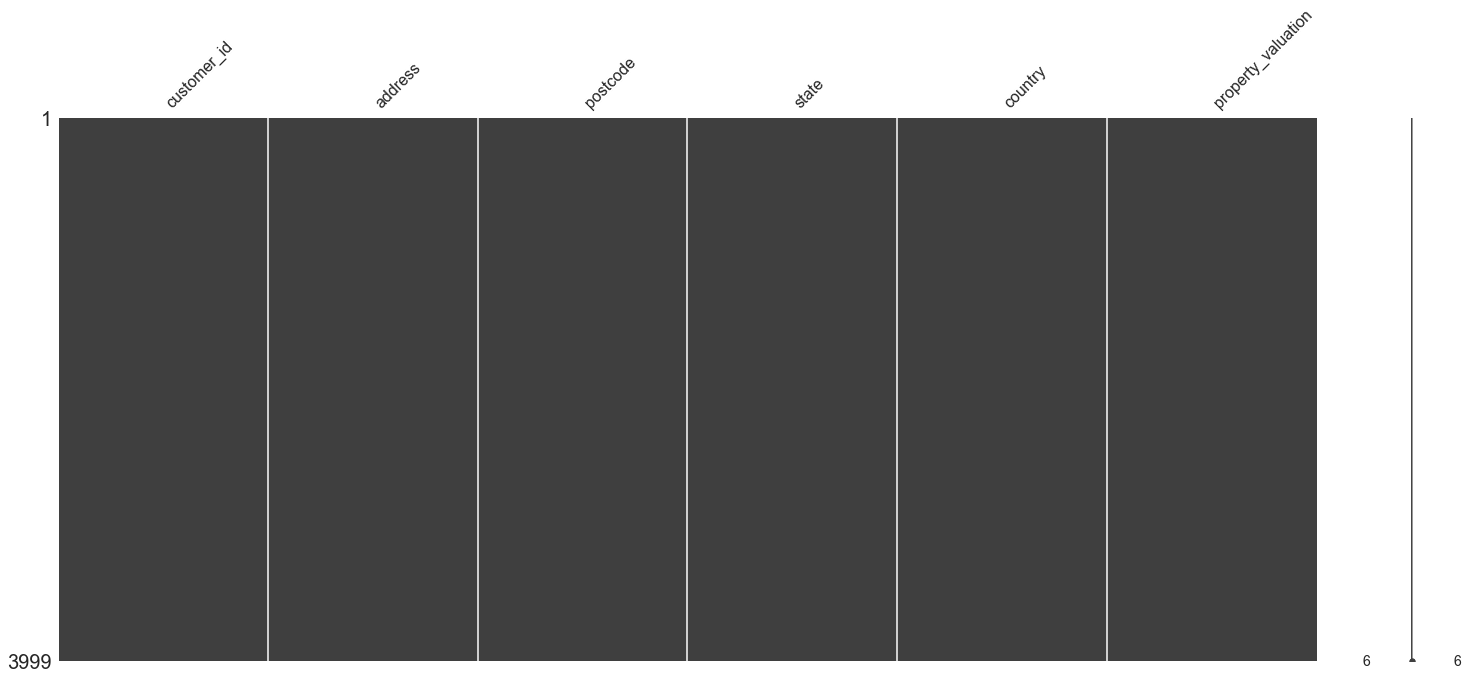

In [28]:
# Visualize missing values as a matrix
msno.matrix(CustomerAddr)

In [29]:
# Check unique values
CustomerAddr.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [30]:
CustomerAddr['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [31]:
# Five NUmbers Summary
CustomerAddr.describe(include='all')

customer_id                  address     postcode state    country  \
count   3999.000000                     3999  3999.000000  3999       3999   
unique          NaN                     3996          NaN     5          1   
top             NaN  3 Mariners Cove Terrace          NaN   NSW  Australia   
freq            NaN                        2          NaN  2054       3999   
mean    2003.987997                      NaN  2985.755939   NaN        NaN   
std     1154.576912                      NaN   844.878364   NaN        NaN   
min        1.000000                      NaN  2000.000000   NaN        NaN   
25%     1004.500000                      NaN  2200.000000   NaN        NaN   
50%     2004.000000                      NaN  2768.000000   NaN        NaN   
75%     3003.500000                      NaN  3750.000000   NaN        NaN   
max     4003.000000                      NaN  4883.000000   NaN        NaN   

        property_valuation  
count          3999.000000  
unique                 NaN  
top                    NaN  
freq                   NaN  
mean              7.514379  
std               2.824663  
min               1.000000  
25%               6.000000  
50%               8.000000  
75%              10.000000  
max              12.000000

**Conclusions:**
- 3999 entries
- No missing values

## Table: NewCustomer

In [32]:
# First five lines
NewCustomer.head()

first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

         DOB                   job_title job_industry_category  \
0 1957-07-12             General Manager         Manufacturing   
1 1970-03-22         Structural Engineer              Property   
2 1974-08-28      Senior Cost Accountant    Financial Services   
3 1979-01-28  Account Representative III         Manufacturing   
4 1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer                  N      Yes  ...    QLD  Australia   
1      Mass Customer                  N       No  ...    NSW  Australia   
2  Affluent Customer                  N       No  ...    VIC  Australia   
3  Affluent Customer                  N      Yes  ...    QLD  Australia   
4  Affluent Customer                  N       No  ...    NSW  Australia   

   property_valuation Unnamed: 16 Unnamed: 17  Unnamed: 18  Unnamed: 19  \
0                   6        0.84       1.050       1.3125     1.115625   
1                  11        0.41       0.410       0.5125     0.435625   
2                   5        0.93       0.930       0.9300     0.930000   
3                   1        0.74       0.925       0.9250     0.925000   
4                   9        0.56       0.560       0.7000     0.700000   

   Unnamed: 20  Rank     Value  
0            1     1  1.718750  
1            1     1  1.718750  
2            1     1  1.718750  
3            4     4  1.703125  
4            4     4  1.703125  

[5 rows x 23 columns]

In [33]:
# Data shape & type
NewCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [34]:
# Check missing values
NewCustomer.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

<AxesSubplot:>

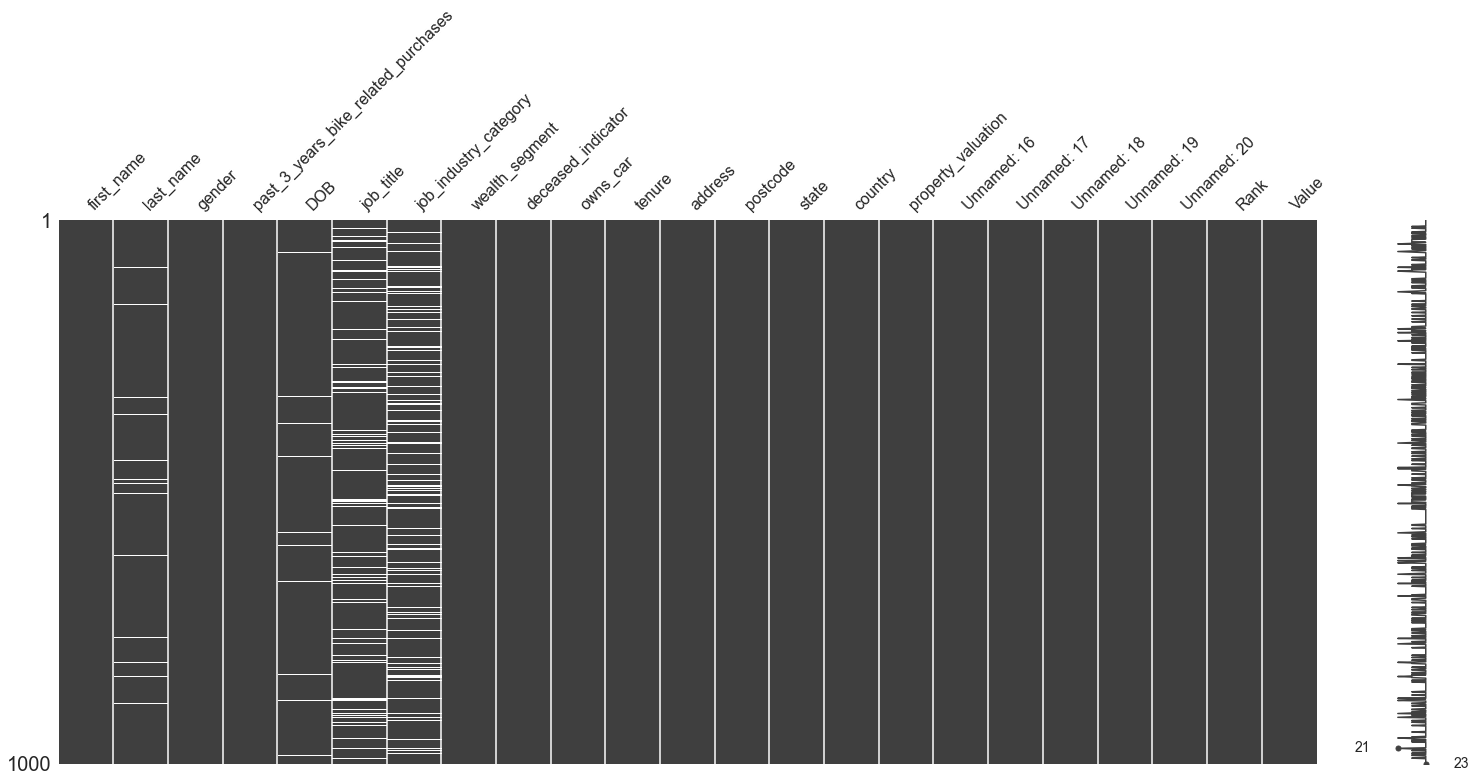

In [35]:
# Visualize missing values as a matrix
msno.matrix(NewCustomer)

In [36]:
# Check unique values
NewCustomer.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             186
Unnamed: 19                             327
Unnamed: 20                             324
Rank                                    324
Value                           

In [37]:
# Five NUmbers Summary
NewCustomer.describe(include='all')

first_name last_name  gender  past_3_years_bike_related_purchases  \
count        1000       971    1000                          1000.000000   
unique        940       961       3                                  NaN   
top      Rozamond    Sissel  Female                                  NaN   
freq            3         2     513                                  NaN   
first         NaN       NaN     NaN                                  NaN   
last          NaN       NaN     NaN                                  NaN   
mean          NaN       NaN     NaN                            49.836000   
std           NaN       NaN     NaN                            27.796686   
min           NaN       NaN     NaN                             0.000000   
25%           NaN       NaN     NaN                            26.750000   
50%           NaN       NaN     NaN                            51.000000   
75%           NaN       NaN     NaN                            72.000000   
max           NaN       NaN     NaN                            99.000000   

                        DOB            job_title job_industry_category  \
count                   983                  894                   835   
unique                  958                  184                     9   
top     1998-02-05 00:00:00  Associate Professor    Financial Services   
freq                      2                   15                   203   
first   1938-06-08 00:00:00                  NaN                   NaN   
last    2002-02-27 00:00:00                  NaN                   NaN   
mean                    NaN                  NaN                   NaN   
std                     NaN                  NaN                   NaN   
min                     NaN                  NaN                   NaN   
25%                     NaN                  NaN                   NaN   
50%                     NaN                  NaN                   NaN   
75%                     NaN                  NaN                   NaN   
max                     NaN                  NaN                   NaN   

       wealth_segment deceased_indicator owns_car  ...  state    country  \
count            1000               1000     1000  ...   1000       1000   
unique              3                  1        2  ...      3          1   
top     Mass Customer                  N       No  ...    NSW  Australia   
freq              508               1000      507  ...    506       1000   
first             NaN                NaN      NaN  ...    NaN        NaN   
last              NaN                NaN      NaN  ...    NaN        NaN   
mean              NaN                NaN      NaN  ...    NaN        NaN   
std               NaN                NaN      NaN  ...    NaN        NaN   
min               NaN                NaN      NaN  ...    NaN        NaN   
25%               NaN                NaN      NaN  ...    NaN        NaN   
50%               NaN                NaN      NaN  ...    NaN        NaN   
75%               NaN                NaN      NaN  ...    NaN        NaN   
max               NaN                NaN      NaN  ...    NaN        NaN   

        property_valuation  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
count          1000.000000  1000.000000  1000.000000  1000.000000   
unique                 NaN          NaN          NaN          NaN   
top                    NaN          NaN          NaN          NaN   
freq                   NaN          NaN          NaN          NaN   
first                  NaN          NaN          NaN          NaN   
last                   NaN          NaN          NaN          NaN   
mean              7.397000     0.755770     0.848630     0.954237   
std               2.758804     0.193955     0.237195     0.285216   
min               1.000000     0.400000     0.400000     0.400000   
25%               6.000000     0.600000     0.660000     0.733281   
50%               8.000000     0.760000     0.850000     0.937500   
75%         

In [38]:
NewCustomer['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [39]:
NewCustomer.nsmallest(3, ['DOB'])['DOB']

797   1938-06-08
885   1938-06-09
769   1938-08-05
Name: DOB, dtype: datetime64[ns]

In [40]:
NewCustomer.nlargest(3, ['DOB'])['DOB']

354   2002-02-27
396   2002-01-17
763   2002-01-04
Name: DOB, dtype: datetime64[ns]

In [41]:
NewCustomer['job_title'].value_counts()

Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assistant Manager           12
                            ..
Accountant II                1
Programmer IV                1
Administrative Officer       1
Accounting Assistant III     1
Web Developer I              1
Name: job_title, Length: 184, dtype: int64

In [42]:
NewCustomer['job_title'].isnull().sum()

106

In [43]:
NewCustomer['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [44]:
NewCustomer['job_industry_category'].isnull().sum()

165

**Conclusions:**
- 1000 entries in total
- contains missing values

**Problems need to be tackled:**
- Fill in missing values in "last name" with 'unknown'
- Replace missing values in col "job_title" & com "job_industry" with "unknown"
- Tackel with gender == 'U'
- Remove 'unnamed' columns
- remove rows whose 'DOB' is null

# Data cleansing

## Table: Transactions

In [4]:
# Convert "product_first_sold_date" to readable dates
# import datetime as dt (uncomment if necessary)
Transactions['product_first_sold_date'] = pd.TimedeltaIndex(Transactions['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)

In [5]:
# Remove rows which contain missing values
Transactions.dropna(inplace=True) #remove: 20000 --> 19445 (2.8%)

In [6]:
Transactions.shape

(19445, 13)

## Table: CustomerDemo

In [48]:
# Fill in Nulls in 'last name' with 'unknown'
CustomerDemo['last_name'].fillna("Unknown", inplace = True)

In [49]:
# Fill in Nulls in 'job_title' and 'job_industry_category' with 'unknown'
CustomerDemo['job_title'].fillna("Unknown", inplace = True)
CustomerDemo['job_industry_category'].fillna("Unknown", inplace = True)

In [50]:
# Remove 'dafault' col
del CustomerDemo['default']

In [51]:
# Tackel with "gender" formatting issue
# Use external API: guess gender based on first name

In [52]:
CustomerDemo['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [53]:
CustomerDemo['gender'].replace({'M' : 'Male', 
                                'F' : 'Female', 
                                'Femal' : 'Female'}, 
                               inplace=True)

In [54]:
CustomerDemo['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [55]:
# API
import gender_guesser.detector as gender

In [56]:
# define a function
def genderGuess(first_name):
    d = gender.Detector()
    g = d.get_gender(first_name)
    
    return g

In [57]:
# this is a test
genderGuess('Jason')

'male'

In [58]:
temp_df = CustomerDemo[CustomerDemo['gender']=='U']

In [59]:
df = pd.DataFrame(temp_df['first_name'].apply(lambda x: genderGuess(x)))

In [60]:
df.rename(columns={"first_name": "gender_updated"}, inplace=True)

In [61]:
CustomerDemo = CustomerDemo.join(df)

In [62]:
CustomerDemo["gender"] = np.where(CustomerDemo["gender"] == "U", CustomerDemo["gender_updated"], CustomerDemo["gender"])

In [63]:
del CustomerDemo['gender_updated']

In [64]:
# new CustomerDemo table with gender updated
CustomerDemo['gender'].value_counts()

Female         2039
Male           1873
unknown          38
male             27
female           20
andy              2
mostly_male       1
Name: gender, dtype: int64

In [65]:
CustomerDemo['gender'].replace({'male' : 'Male', 
                                'female' : 'Female', 
                                'mostly_male' : 'Male',
                               'unknown': np.NaN,
                               'andy': np.NaN}, 
                               inplace=True)

In [66]:
# for later check
CustomerDemo['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [67]:
CustomerDemo['gender'].value_counts()

Female    2059
Male      1901
Name: gender, dtype: int64

In [68]:
CustomerDemo['gender'].isnull().sum()

40

In [69]:
# Remove odd value in 'DOB' column
CustomerDemo.drop(CustomerDemo[CustomerDemo['DOB'] == '1843-12-21'].index, inplace = True)

In [70]:
CustomerDemo.dropna(inplace=True) #remove: 4000 --> 3912 (2.2%)

In [71]:
CustomerDemo.shape

(3912, 12)

## Table: CustomerAddr

In [ ]:
# Tackel with the state names 'VIC'= 'Victoria', 'NSW' = 'New South Wales'

In [72]:
CustomerAddr['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [73]:
CustomerAddr['state'].replace({'New South Wales' : 'NSW', 
                                'Victoria' : 'VIC'}, 
                               inplace=True)

In [74]:
CustomerAddr.shape

(3999, 6)

## Table: NewCustomer

In [76]:
# Fill in 'last name' with 'unknown'
NewCustomer['last_name'].fillna('unknown', inplace=True)

In [77]:
# Fill in Nulls in 'job_title' and 'job_industry_category' with 'unknown'
NewCustomer['job_title'].fillna("Unknown", inplace = True)
NewCustomer['job_industry_category'].fillna("Unknown", inplace = True)

In [78]:
# remove "unnamed" cols

In [79]:
#get the col names
NewCustomer.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [80]:
NewCustomer.drop(labels=['Unnamed: 16', 
                         'Unnamed: 17', 
                         'Unnamed: 18', 
                         'Unnamed: 19', 
                         'Unnamed: 20'], axis=1, inplace=True)

In [81]:
NewCustomer['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [82]:
temp_df = NewCustomer[NewCustomer['gender']=='U']

In [83]:
df = pd.DataFrame(temp_df['first_name'].apply(lambda x: genderGuess(x)))

In [84]:
df.rename(columns={"first_name": "gender_updated"}, inplace=True)

In [85]:
NewCustomer = NewCustomer.join(df)

In [86]:
NewCustomer["gender"] = np.where(NewCustomer["gender"] == "U", NewCustomer["gender_updated"], NewCustomer["gender"])

In [87]:
del NewCustomer['gender_updated']

In [88]:
# new CustomerDemo table with gender updated
NewCustomer['gender'].value_counts()

Female           513
Male             470
unknown            8
female             5
male               3
mostly_female      1
Name: gender, dtype: int64

In [89]:
NewCustomer['gender'].unique()

array(['Male', 'Female', 'unknown', 'male', 'mostly_female', 'female'],
      dtype=object)

In [90]:
NewCustomer['gender'].replace({'male' : 'Male', 
                                'female' : 'Female', 
                                'mostly_female' : 'Female',
                               'unknown': np.NaN}, 
                               inplace=True)

In [91]:
# for later check
NewCustomer['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [92]:
NewCustomer['gender'].value_counts()

Female    519
Male      473
Name: gender, dtype: int64

In [93]:
NewCustomer['gender'].isnull().sum()

8

In [94]:
NewCustomer.dropna(inplace=True) #remove: 1000 --> 983 (1.7%)

In [95]:
NewCustomer.shape

(983, 18)

## Final check

<AxesSubplot:>

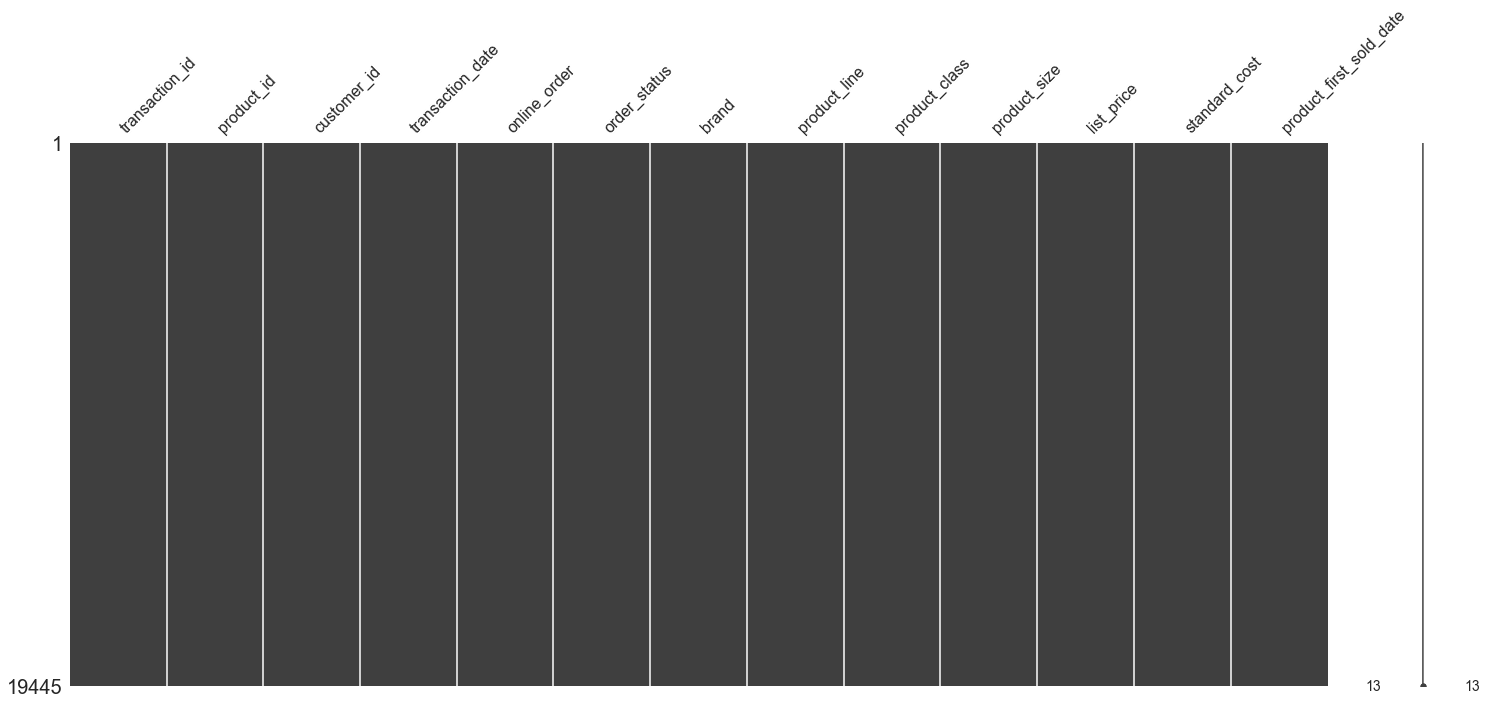

In [96]:
msno.matrix(Transactions)

<AxesSubplot:>

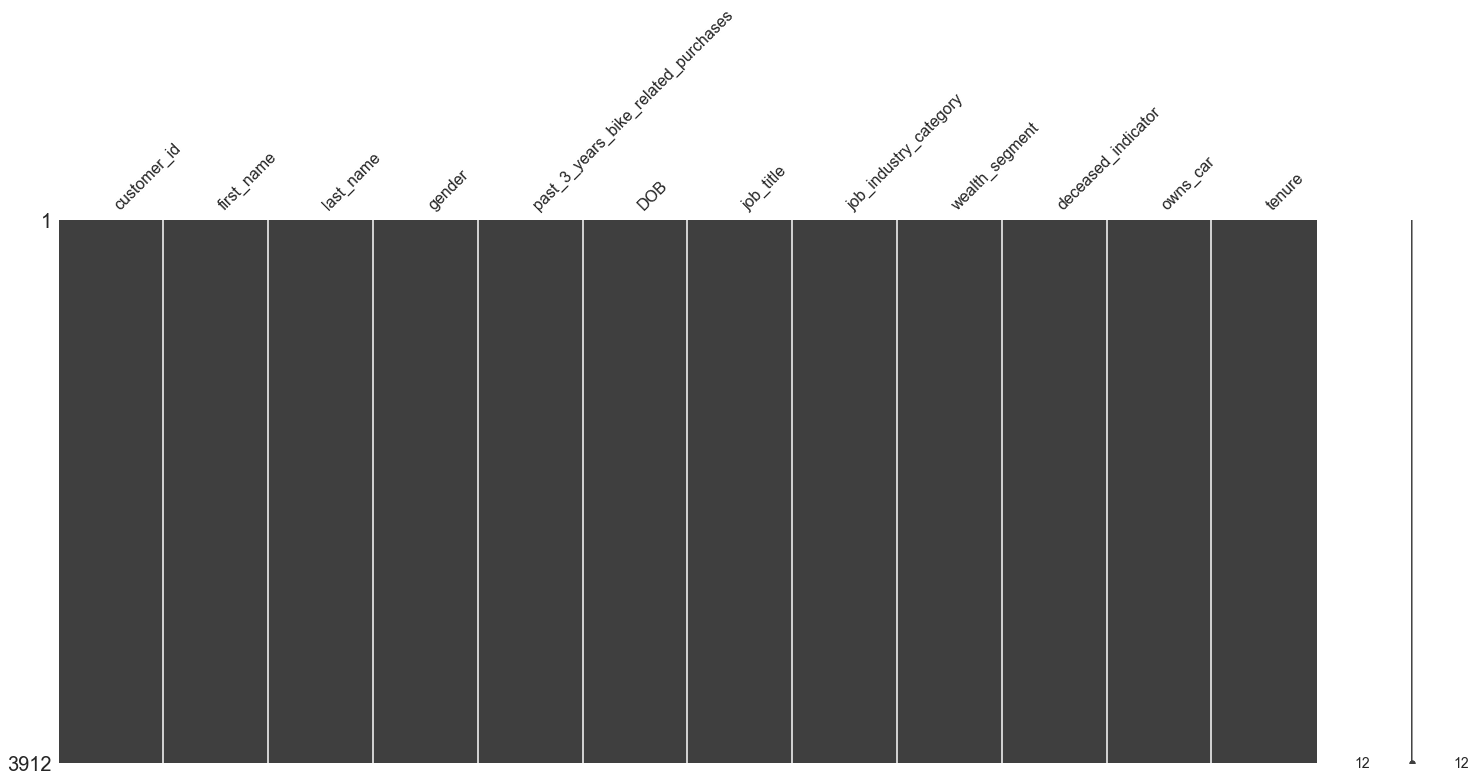

In [97]:
msno.matrix(CustomerDemo)

<AxesSubplot:>

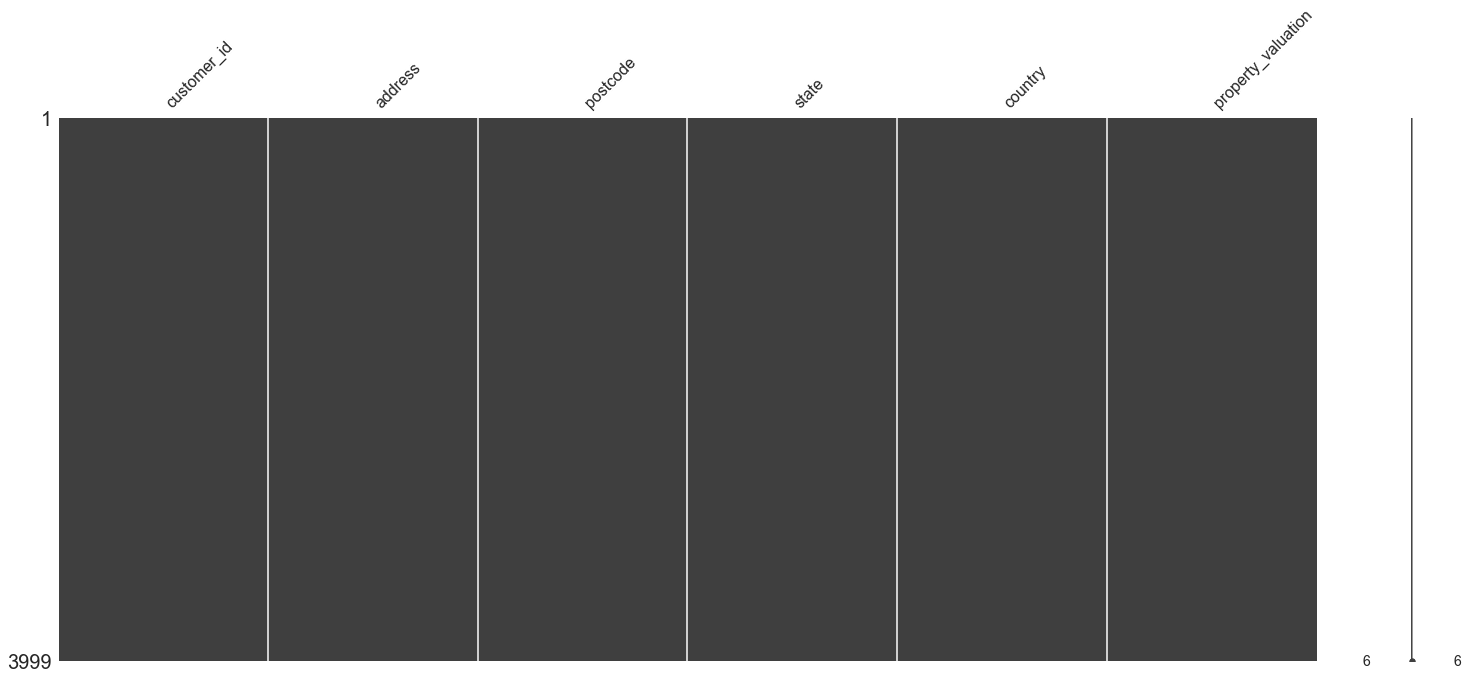

In [98]:
msno.matrix(CustomerAddr)

<AxesSubplot:>

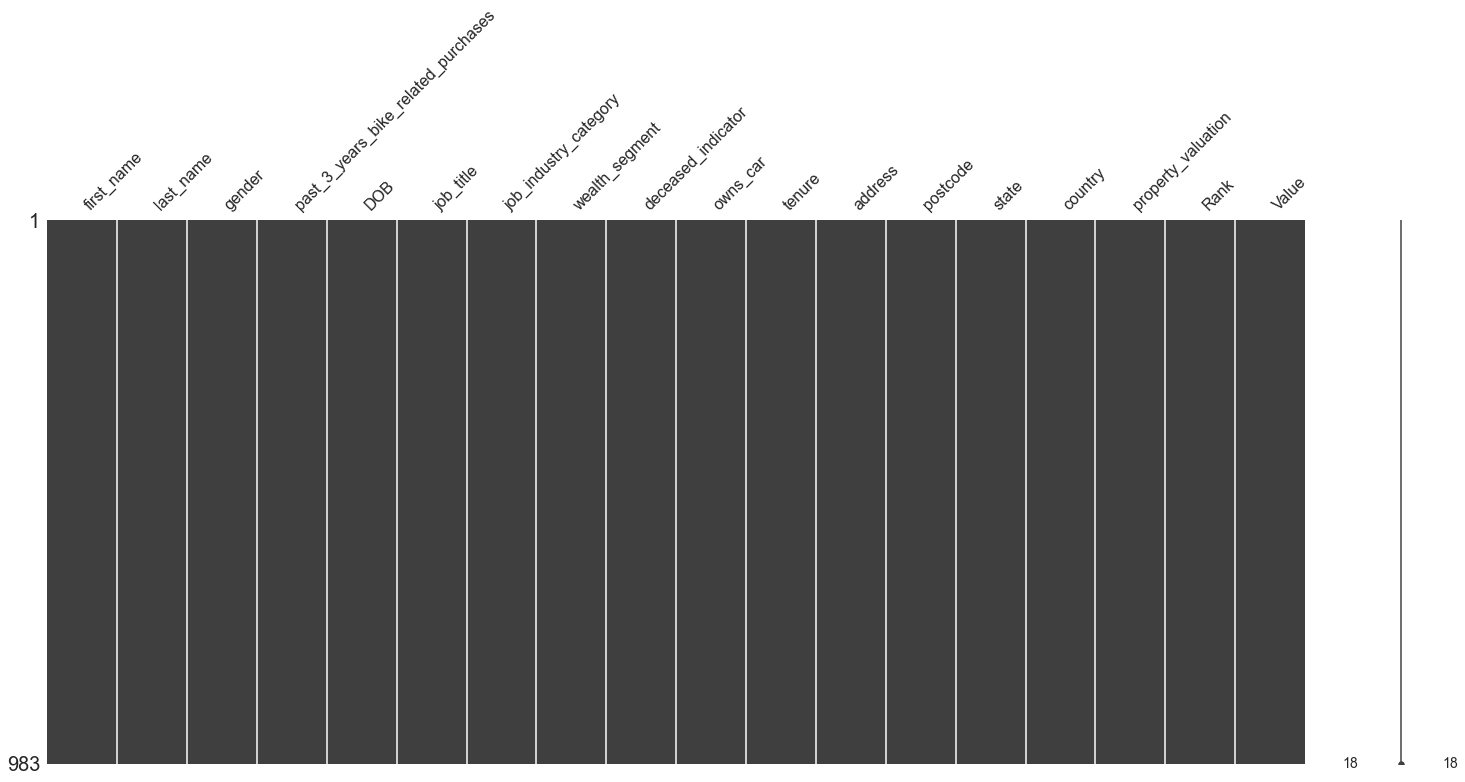

In [99]:
msno.matrix(NewCustomer)

# Export datasets

In [7]:
Transactions.to_excel('Transactions.xlsx', index=False)

In [101]:
CustomerDemo.to_excel('CustomerDemo.xlsx', index=False)

In [102]:
CustomerAddr.to_excel('CustomerAddr.xlsx', index=False)

In [103]:
NewCustomer.to_excel('NewCustomer.xlsx', index=False)